In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import string

In [3]:
url = "http://www.popvortex.com/music/charts/top-100-songs.php"

In [4]:
response = requests.get(url)
response.status_code

200

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
soup.select('div.chart-content.col-xs-12.col-sm-8 > p')

[<p class="title-artist"><cite class="title">About Damn Time</cite><em class="artist">Lizzo</em></p>,
 <p class="title-artist"><cite class="title">This Love</cite><em class="artist">Taylor Swift</em></p>,
 <p class="title-artist"><cite class="title">Hold My Hand</cite><em class="artist">Lady Gaga</em></p>,
 <p class="title-artist"><cite class="title">As It Was</cite><em class="artist">Harry Styles</em></p>,
 <p class="title-artist"><cite class="title">First Class</cite><em class="artist">Jack Harlow</em></p>,
 <p class="title-artist"><cite class="title">WAIT FOR U (feat. Drake &amp; Tems)</cite><em class="artist">Future</em></p>,
 <p class="title-artist"><cite class="title">Rockstar</cite><em class="artist">Nickelback</em></p>,
 <p class="title-artist"><cite class="title">Kryptonite</cite><em class="artist">3 Doors Down</em></p>,
 <p class="title-artist"><cite class="title">AA</cite><em class="artist">Walker Hayes</em></p>,
 <p class="title-artist"><cite class="title">That That (prod. 

In [7]:
soup.select('p cite')[0].get_text()

'About Damn Time'

In [8]:
soup.select('p em')[0].get_text()

'Lizzo'

In [9]:
title = []
artist = []
num_iter = len(soup.select('div.chart-content.col-xs-12.col-sm-8 > p'))

for i in range((num_iter)):
    title.append(soup.select('p cite')[i].get_text())
    artist.append(soup.select('p em')[i].get_text())
print(len(artist))
print(len(title))

100
100


In [10]:
pd.set_option('display.max_rows', 100)

In [11]:
hits = pd.DataFrame({"title":title,
                       "artist": artist,
                      })
hits

,title,artist
0,About Damn Time,Lizzo
1,This Love,Taylor Swift
2,Hold My Hand,Lady Gaga
3,As It Was,Harry Styles
4,First Class,Jack Harlow
5,WAIT FOR U (feat. Drake & Tems),Future
6,Rockstar,Nickelback
7,Kryptonite,3 Doors Down
8,AA,Walker Hayes
9,That That (prod. & feat. SUGA of BTS),PSY


In [12]:
hits['title']= list(map(lambda x: x.split('(')[0], hits['title']))
hits['title'] = list(map(lambda x: x.lower(), hits['title']))
hits['artist'] = list(map(lambda x: x.lower(), hits['artist']))
hits.head(100)

,title,artist
0,about damn time,lizzo
1,this love,taylor swift
2,hold my hand,lady gaga
3,as it was,harry styles
4,first class,jack harlow
5,wait for u,future
6,rockstar,nickelback
7,kryptonite,3 doors down
8,aa,walker hayes
9,that that,psy


In [13]:
import random 
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()

    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
jn
We could not recognize that. Please enter "song" or "artist".


In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

In [15]:
final_df = pd.read_csv('final_df.csv')

In [16]:
final_df.reset_index(drop = True, inplace = True)
final_df.drop('Unnamed: 0', axis = 1, inplace = True)
final_df

,song,artist,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Vienna,Billy Joel,spotify:track:4U45aEWtQhrm8A5mxPaFZ7,0.65900,0.532,214240,0.495,0.000000,10,0.0754,-6.662,1,0.0343,124.936,4,0.3080
1,Virtual Insanity,Jamiroquai,spotify:track:19ZWoeA7ZvCHc0jeDPrq5S,0.18900,0.616,340333,0.822,0.000096,6,0.3470,-10.228,1,0.0834,91.914,4,0.5400
2,Piano Man,Billy Joel,spotify:track:1TpxoHaDRVAUQbJsKKZGAv,0.60600,0.330,339027,0.551,0.000003,0,0.1870,-6.506,1,0.0275,177.654,3,0.4140
3,Cosmic Girl,Jamiroquai,spotify:track:2fiRJjWb9uk21Gva6oHpKs,0.03480,0.643,242973,0.934,0.000654,11,0.3030,-6.651,0,0.0513,119.838,4,0.9290
4,A Heady Tale,The Fratellis,spotify:track:6IvPf76ALwZTcmxOVFPB0v,0.00431,0.563,292653,0.795,0.000000,0,0.1310,-5.356,1,0.0419,116.681,4,0.7630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,Come Back Home,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,0.00678,0.601,190539,0.801,0.000000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890
140732,Enough for You,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,0.91800,0.387,194583,0.249,0.000000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460
140733,Do It,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,0.33000,0.717,139191,0.532,0.000000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460
140734,No Smoke,D Savage,5iGBXzOoRo4sBTy8wdzMyK,0.00790,0.772,180013,0.510,0.000000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755


In [17]:
df_num = final_df.select_dtypes(include = np.number)

In [18]:
scaler = StandardScaler().fit(df_num)
ar_num_prep = scaler.transform(df_num)

In [19]:
df_num_prep = pd.DataFrame(ar_num_prep,columns=df_num.columns)
df_num_prep

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.931366,-0.258033,0.001312,-0.301279,-0.609586,1.323962,-0.712583,0.495630,0.798957,-0.613066,0.179309,0.233315,-0.524142
1,-0.435761,0.188628,1.042901,0.961978,-0.609315,0.213389,0.909085,-0.059560,0.798957,-0.211175,-0.919386,0.233315,0.372026
2,0.777200,-1.332147,1.032113,-0.084942,-0.609577,-1.452469,-0.046242,0.519917,0.798957,-0.668725,1.933322,-1.741178,-0.114686
3,-0.884295,0.332197,0.238660,1.394654,-0.607745,1.601605,0.646370,0.497342,-1.251632,-0.473919,0.009690,0.233315,1.874652
4,-0.972983,-0.093194,0.649041,0.857673,-0.609586,-1.452469,-0.380607,0.698960,0.798957,-0.550859,-0.095348,0.233315,1.233429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,-0.965799,0.108867,-0.194470,0.880852,-0.609586,1.601605,-0.571075,0.727296,0.798957,-0.629437,0.382698,0.233315,-0.597535
140732,1.684740,-1.029055,-0.161065,-1.251620,-0.609586,1.046319,-0.547789,-0.527408,0.798957,-0.536126,-0.848684,0.233315,-0.377356
140733,-0.025623,0.725684,-0.618629,-0.158342,-0.609586,0.768675,-0.567493,0.232670,-1.251632,0.792324,1.245365,0.233315,0.395203
140734,-0.962541,1.018141,-0.281420,-0.243332,-0.609586,-0.341897,-0.380607,0.027315,-1.251632,0.088401,0.016711,0.233315,-1.422241


In [20]:
# K = range(2, 20)
# inertia = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(df_num_prep)
#     inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16,8))
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Elbow Method showing the optimal k')

In [21]:
# from sklearn.metrics import silhouette_score
# K = range(2, 20)
# silhouette = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(df_num_prep)
#     silhouette.append(silhouette_score(df_num_prep, kmeans.predict(df_num_prep)))
#     print(k)
    
# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Slhouette score showing the optimal k')

In [22]:
from sklearn import cluster

In [23]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(df_num_prep)

KMeans(n_clusters=9, random_state=1234)

In [24]:
clusters = kmeans.predict(df_num_prep)

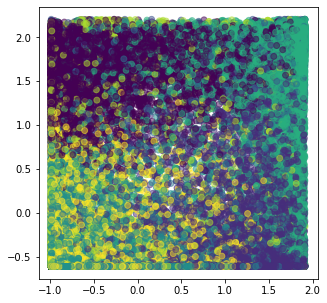

In [25]:
plt.figure(figsize=(5, 5))
plt.scatter(ar_num_prep[:, 0], ar_num_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [26]:
clusters_num = pd.Series(clusters)
clusters_num.value_counts()

4    37472
8    29164
1    18436
0    15971
5    15303
3    13957
7     8200
2     2122
6      111
dtype: int64

In [26]:
clusters_df = pd.DataFrame(clusters_num)
clusters_df.columns = ['cluster']
clusters_df

,cluster
0,1
1,4
2,1
3,8
4,4
...,...
140731,4
140732,1
140733,8
140734,8


In [27]:
clusters_df = pd.concat([final_df, clusters_df], axis = 1)

In [28]:
sac = clusters_df[['song', 'artist', 'cluster']]
sac.columns = ['title', 'artist', 'cluster']
sac

,title,artist,cluster
0,Vienna,Billy Joel,1
1,Virtual Insanity,Jamiroquai,4
2,Piano Man,Billy Joel,1
3,Cosmic Girl,Jamiroquai,8
4,A Heady Tale,The Fratellis,4
...,...,...,...
140731,Come Back Home,Calum Scott,4
140732,Enough for You,Saint Claire,1
140733,Do It,Mike Stud,8
140734,No Smoke,D Savage,8


In [29]:
sac['title'] = sac['title'].apply(str)
sac['artist'] = sac['artist'].apply(str)

C:\Users\herat\AppData\Local\Temp/ipykernel_13816/539594259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['title'] = sac['title'].apply(str)
C:\Users\herat\AppData\Local\Temp/ipykernel_13816/539594259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['artist'] = sac['artist'].apply(str)


In [30]:
sac['title'] = list(map(lambda x: x.lower(), sac['title']))
sac['artist'] = list(map(lambda x: x.lower(), sac['artist']))
sac.head()

C:\Users\herat\AppData\Local\Temp/ipykernel_13816/2352926059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['title'] = list(map(lambda x: x.lower(), sac['title']))
C:\Users\herat\AppData\Local\Temp/ipykernel_13816/2352926059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['artist'] = list(map(lambda x: x.lower(), sac['artist']))


,title,artist,cluster
0,vienna,billy joel,1
1,virtual insanity,jamiroquai,4
2,piano man,billy joel,1
3,cosmic girl,jamiroquai,8
4,a heady tale,the fratellis,4


In [31]:
artist = input()
artist = artist.lower()

john lennon


In [62]:
import random 
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    
    elif song in str(sac['title']):
        print('True')
        i = sac.index[sac['title']== song][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.title)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('Cluster:', n)
    
    else:
        print('Sorry we have no recomendations for you yet')

elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()
    
    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    
    elif (sac['artist'].isin([artist]).any()) == True:
        i = sac.index[sac['artist']== artist][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.artist)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('Cluster:', n)  
    
    else:
        print('Sorry we have no recomendations for you yet')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
song
Enter a song: 
vienna
True
Your song recomentation is: Don't Waste Your Tears by Joshua Hedley
Cluster: 1


In [35]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from random import randint
from time import sleep

In [36]:
secrets_file = open("..\\lab-api-wrappers\\secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(': ')[0]]=line.split(': ')[1]

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [71]:
import random 
import string
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    
    elif song in str(sac['title']):
        i = sac.index[sac['title']== song][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.title)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('Cluster:', n)
           
    
    else:
        result = sp.search(q = song, limit=1)
        song_uri = result["tracks"]["items"][0]["uri"]
        audio_features = sp.audio_features(song_uri)
        audio_features = pd.DataFrame.from_dict(data = audio_features, orient = 'columns')
        audio_features_num = audio_features.select_dtypes(include = np.number)
        audio_features_num = audio_features_num.reindex(columns=['acousticness', 'danceability', 'duration_ms', 'energy',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
               'speechiness', 'tempo', 'time_signature', 'valence']) 
        ar_num_prep2 = scaler.transform(audio_features_num)
        cluster = kmeans.predict(ar_num_prep2)
        sac2 = sac[sac['cluster'] == cluster[0]].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.title)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('From: Spotify api')

        
elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()

    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    
    elif (sac['artist'].isin([artist]).any()) == True:
        i = sac.index[sac['artist']== artist][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.artist)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('Cluster:', n)  
    
    else:
        result = sp.search(q = artist, limit=1)
        song_uri = result["tracks"]["items"][0]["uri"]
        audio_features = sp.audio_features(song_uri)
        audio_features = pd.DataFrame.from_dict(data = audio_features, orient = 'columns')
        audio_features_num = audio_features.select_dtypes(include = np.number)
        audio_features_num = audio_features_num.reindex(columns=['acousticness', 'danceability', 'duration_ms', 'energy',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
               'speechiness', 'tempo', 'time_signature', 'valence']) 
        ar_num_prep2 = scaler.transform(audio_features_num)
        cluster = kmeans.predict(ar_num_prep2)
        sac2 = sac[sac['cluster'] == cluster[0]].reset_index(drop = True)
        random_index = random.randint(0, len(sac2.title)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
        print('Cluster:', n)
        print('From Spotify api')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
artist
Enter an artist: 
beethoven
Your song recomentation is: Weight by Freddie Gibbs
Cluster: 8
From Spotify api


C:\Users\herat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [81]:
result = sp.search(q = artist, limit=1)
result

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=beethoven&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NLseG7xyv3fHY5U8AUntx'},
       'href': 'https://api.spotify.com/v1/artists/2NLseG7xyv3fHY5U8AUntx',
       'id': '2NLseG7xyv3fHY5U8AUntx',
       'name': 'Kenndog',
       'type': 'artist',
       'uri': 'spotify:artist:2NLseG7xyv3fHY5U8AUntx'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ'